In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [26]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [27]:
x_train[0].shape

(28, 28)

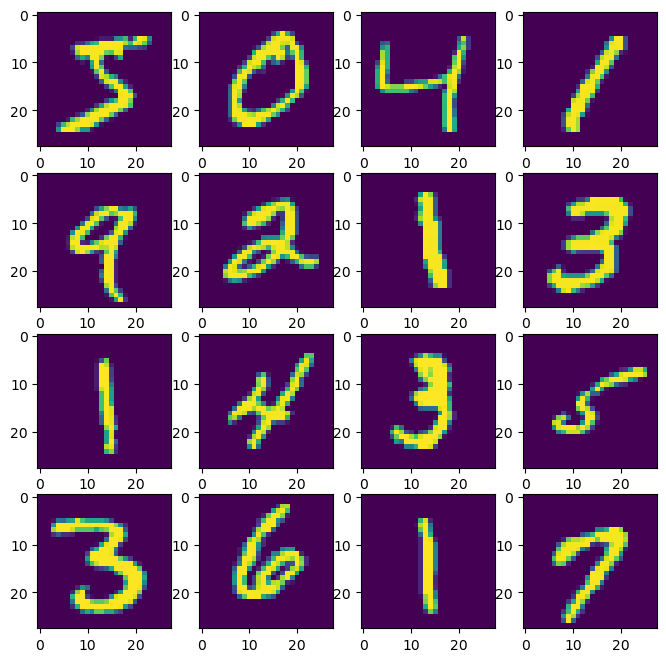

In [28]:
fig=plt.figure(figsize=(8, 8))
for i in range(16):
    ax=fig.add_subplot(4, 4, i+1)
    ax.imshow(x_train[i].reshape((28, 28)))
plt.show()

In [29]:
# flattening the image and normalizing pixel values to be between 0 and 1
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32')/225.0
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32')/225.0

In [30]:
# converting label into one hot encoding format
y_train = tf.keras.utils.to_categorical(y_train, num_classes= 10)
y_test = tf.keras.utils.to_categorical(y_test,  num_classes= 10)

In [31]:
# Split training data into train and validation sets
x_train, x_val = x_train[:55000], x_train[55000:]
y_train, y_val = y_train[:55000], y_train[55000:]

In [32]:
# model parameters
n_inputs = 784      # number of input features
# number of neurons in each hidden layer
n_hidden1 = 1000
n_hidden2 = 1000
n_hidden3 = 1000
n_hidden4 = 1000
n_classes = 10 # number of output classes 

# weight variables initialized with random normal values
weights = {
    "h1": tf.Variable(tf.random.normal((n_inputs, n_hidden1))),
    "h2": tf.Variable(tf.random.normal((n_hidden1, n_hidden2))),
    "h3": tf.Variable(tf.random.normal((n_hidden2, n_hidden3))),
    "h4": tf.Variable(tf.random.normal((n_hidden3, n_hidden4))),
    "output": tf.Variable(tf.random.normal((n_hidden4, n_classes)))
}

# bias variables initialized with random normal values
biases = {
    "h1": tf.Variable(tf.random.normal((n_hidden1, ))),
    "h2": tf.Variable(tf.random.normal((n_hidden2, ))),
    "h3": tf.Variable(tf.random.normal((n_hidden3, ))),
    "h4": tf.Variable(tf.random.normal((n_hidden4, ))),
    "output": tf.Variable(tf.random.normal((n_classes, )))
}

In [33]:
# defining the Forward Propagation Function
def forward_propagation(x, weights, biases):
    # calculates the input to each hidden layer by performing a matrix multiplication and adding the biases.
    hidden_layer1_input=tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    hidden_layer1_output=tf.nn.selu(hidden_layer1_input)
    
    hidden_layer2_input=tf.add(tf.matmul(hidden_layer1_output, weights['h2']), biases['h2'])
    hidden_layer2_output=tf.nn.tanh(hidden_layer2_input)
    
    hidden_layer3_input=tf.add(tf.matmul(hidden_layer2_output, weights['h3']), biases['h3'])
    hidden_layer3_output=tf.nn.relu(hidden_layer3_input)
    
    hidden_layer4_input=tf.add(tf.matmul(hidden_layer3_output, weights['h4']), biases['h4'])
    hidden_layer4_output=tf.nn.relu(hidden_layer4_input)

    # calculates the output of the networ
    output=tf.add(tf.matmul(hidden_layer4_output, weights['output']), biases['output'])
    
    return output

In [34]:
# Loss function - calculates the cross-entropy loss between the predicted and true labels.

@tf.function
def compute_loss(x, y):
    pred_hot_encoded = forward_propagation(x, weights, biases)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred_hot_encoded, labels=y))
    return cost

In [35]:
# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [36]:
batch_size = 500
num_epochs = 25
for epoch in range(num_epochs):
    number_of_batches = int(len(x_train) / batch_size)
    error = 0

    # # Shuffle the data
    # indices = tf.range(start=0, limit=tf.shape(x_train)[0], dtype=tf.int32)
    # shuffled_indices = tf.random.shuffle(indices)
    # x_train_shuffled = tf.gather(x_train, shuffled_indices)
    # y_train_shuffled = tf.gather(y_train, shuffled_indices)
    
    for batch in range(number_of_batches):
        start = batch * batch_size
        end = start + batch_size
        batch_x, batch_y = x_train[start:end], y_train[start:end]
        #print(batch_x.shape)  # Should be (batch_size, n_inputs)
        #print(batch_y.shape)  # Should be (batch_size, n_classes)
        
        with tf.GradientTape() as tape:
            logits = forward_propagation(batch_x, weights, biases)
            current_loss = compute_loss(batch_x, batch_y)
            
        gradients = tape.gradient(current_loss, list(weights.values()) + list(biases.values()))
        optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))
        
        error += current_loss.numpy()  # Convert tensor to numpy value for accumulation
    
    avg_loss = error / number_of_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/25, Loss: 11784.0206
Epoch 2/25, Loss: 5383.8173
Epoch 3/25, Loss: 3534.6793
Epoch 4/25, Loss: 2650.5808
Epoch 5/25, Loss: 2114.1824
Epoch 6/25, Loss: 1753.8798
Epoch 7/25, Loss: 1486.3506
Epoch 8/25, Loss: 1285.5749
Epoch 9/25, Loss: 1127.1689
Epoch 10/25, Loss: 998.6527
Epoch 11/25, Loss: 893.0381
Epoch 12/25, Loss: 805.9005
Epoch 13/25, Loss: 732.5279
Epoch 14/25, Loss: 666.3325
Epoch 15/25, Loss: 610.2892
Epoch 16/25, Loss: 560.8375
Epoch 17/25, Loss: 514.8518
Epoch 18/25, Loss: 474.6239
Epoch 19/25, Loss: 438.4148
Epoch 20/25, Loss: 405.0585
Epoch 21/25, Loss: 375.1127
Epoch 22/25, Loss: 348.2132
Epoch 23/25, Loss: 322.5000
Epoch 24/25, Loss: 300.1463
Epoch 25/25, Loss: 278.2822


In [37]:
# Evaluation
pred_hot_encoded = forward_propagation(x_train, weights, biases)
pred_predicted = tf.argmax(pred_hot_encoded, axis=1)
pred_true = tf.argmax(y_train, axis=1)

In [38]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred_predicted, pred_true), tf.float32)) * 100
print(f"Training Accuracy: {accuracy.numpy():.2f}%")

Training Accuracy: 93.65%


In [39]:
# Test set evaluation
test_pred_hot_encoded = forward_propagation(x_test, weights, biases)
test_pred_predicted = tf.argmax(test_pred_hot_encoded, axis=1)
test_pred_true = tf.argmax(y_test, axis=1)

In [40]:
test_accuracy = tf.reduce_mean(tf.cast(tf.equal(test_pred_predicted, test_pred_true), tf.float32)) * 100
print(f"Test Accuracy: {test_accuracy.numpy():.2f}%")

Test Accuracy: 82.61%
